# Geradores

## $ \pi^*$

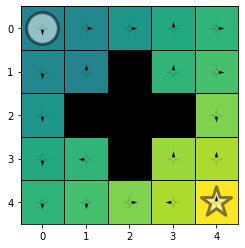

In [1]:
import numpy as np
from grid import Grid
from plot import plotPolicy, plotStateValue, plotActionStateValue, plotEffects, plotTrajectory

g = Grid()
g.pi_star(epsilon=.05)
# g.q_star()

ax = plotEffects(g)
plotPolicy(g.PI, g, ax=ax)
plotActionStateValue(g.Q, g, ax=ax)
# np.array([sum(q) for q in g.Q]).reshape(*g.size)
# g.PI
pi_star = g.PI

## $ h_1 $ 


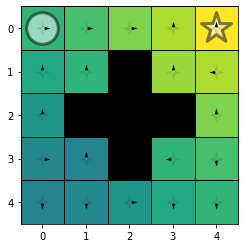

In [2]:
h1 = Grid()
target_1 = 4
h1.effects[(4,4)] = {'noise': lambda a: [-a[0], -a[1]]}
h1.effects[h1.S[target_1]] = {'terminal': True, 'reward': 10}

h1.pi_star(epsilon=.05)

ax = plotEffects(h1)
plotPolicy(h1.PI, h1, ax=ax)
plotActionStateValue(h1.Q, h1, ax=ax)

pi_1 = h1.PI

## $ h_2 $ 

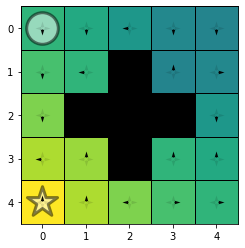

In [3]:
h2 = Grid()

target_2 = 20
h2.effects[(4,4)] = {'noise': lambda a: [-a[0], -a[1]]}
h2.effects[h2.S[target_2]] = {'terminal': True, 'reward': 10}

h2.pi_star(epsilon=.05)

ax = plotEffects(h2)
plotPolicy(h2.PI, h2, ax=ax)
plotActionStateValue(h2.Q, h2, ax=ax)

pi_2 = h2.PI

## $ \xi $

$ \eta(h|s) = \{^{.95 \;\; se \;\; s \in S^h}_{.05 \;\; se \;\; s \notin S^h} \;\; \forall h \in \mathcal{H} \; e \; \forall s \in S$ <br>
$ \pi_h(a|s) = \{^{.9625 \;\; se \;\; a = a^*}_{.0125 \;\; se \;\; a \ne a^*}  \;\; \forall a \in A \; e \; \forall s \in S$ <br>
$ \psi_h(s) = 0.3 \;\; \forall s \in S$

In [4]:
def generateTheta(S, eta=None, pis=None, psis=None):
    if eta is None:
        eta = {
            0: list(set(range(10, 25)) - {14}),
            1: list(range(10))+[14], 
        }
    if psis is None:
        psis = [[.3 for _ in g.S] for _ in range(2)]
    if pis is None: 
        pis = [pi_1, pi_2]
    
    H = list(zip(pis, psis))
    _eta = np.array([[.95 if s in eta[h] else .05 for h,_ in enumerate(H)] for s,_ in enumerate(S)])

    return H, _eta
    
generateTheta(g.S)

([(array([[0.0125, 0.0125, 0.9625, 0.0125],
          [0.0125, 0.0125, 0.9625, 0.0125],
          [0.0125, 0.0125, 0.9625, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.0125, 0.0125, 0.0125, 0.9625],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.0125, 0.0125, 0.9625, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.0125, 0.0125, 0.0125, 0.9625],
          [0.0125, 0.9625, 0.0125, 0.0125],
          [0.0125, 0.9625, 0.0125, 0.0125],
          [0.0125, 0.9625, 0.0125, 0.0125],
          [0.0125, 0.0125, 0.962

<AxesSubplot: >

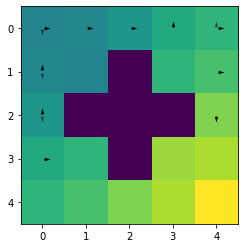

In [5]:
import random

def generateTrajetoryPi(pi, g, size=10):
    s = 0

    arr = []
    for _ in range(size-1):
        a  = random.choices(list(range(len(g.A))), pi[s], k=1)[0]
        step =  (s, a)
        s,_,_ = g.transition(s,  a)
        arr.append(step)
    arr.append((s, None))

    return arr

def generateTrajetory(eta, H, g, size=10):
    s = 0
    b = 1
    h = None
    arr = []
    for _ in range(size-1):
        if b == 1:
            h = random.choices(list(range(len(eta[s]))), eta[s], k=1)[0]
        
        pi, psi = H[h]
        
        a  = random.choices(list(range(len(pi[s]))), pi[s], k=1)[0]
        step =  (s, a)
        s,_,_ = g.transition(s,  a)
        arr.append(step)
        b = random.choices([0,1], [1-psi[s], psi[s]], k=1)[0]
    arr.append((s, None))

    return arr


tH = {1: list(range(10))+[14], 0: list(set(range(10, 25)) - {14}) }
psi_1 = [.3 for _ in g.S]
psi_2 = [.3 for _ in g.S]
H = [
    (pi_1, psi_1),
    (pi_2, psi_2)
]
eta = np.array([[.95 if s in tH[h] else .05 for h,_ in enumerate(H)] for s,_ in enumerate(g.S)])

E = generateTrajetory(eta, H, g, 15)
# E = generateTrajetoryPi(pi_star, g)

# ax = plotEffects(g)
# plotPolicy(h_2.PI, h_2, ax=ax)
ax = plotTrajectory(E, g)
plotActionStateValue(g.Q, g, ax=ax)

In [6]:
eta2, H2 = generateTheta(g.S)
H2[0][1]

0.95

In [7]:
from ddo import DDO 

ddo = DDO()

print(ddo.posterior(0, E, H, eta))
print(ddo.expectation_gradient(E, H, eta))

9.504103867271674e-05
-2.8615307731713617


In [8]:
p1_psi = [[.1 for _ in g.S]]*2
p2_psi = [[.9 for _ in g.S]]*2
p3_psi = [[.5 for _ in g.S]]*2
p_star_psi = [psi_1, psi_2]

psis = [p1_psi, p2_psi, p3_psi] + [p_star_psi]

ddo = DDO()
likes = [ddo.expectation_gradient(E, *generateTheta(g.S, psis=psi)) for psi in psis]
likes

p = np.argmax(likes)
print(f'Maior: {p}\n', likes)

Maior: 0
 [13.276065080814941, -45.806841895128784, -9.861312560061279, -2.8615307731713617]


In [9]:
thetas = [.9, .1, .5] + [.3] 

def teste():
    E = generateTrajetory(*generateTheta(g.S)[::-1], g, 15)
    return [ddo.expectation_gradient(E, *generateTheta(g.S, psis=psi)) for psi in psis]

psis = [[[theta for _ in g.S]]*2 for theta in thetas]

total_episodes = 100
exps = [teste() for _ in range(total_episodes)]
freq = [np.mean([int(np.argmax(v)==i) for v in exps])for i in range(len(psis))]
print(np.argmax(np.sum(exps, axis=0)))
print(np.sum(exps, axis=0))
# print(freq)

1
[-3741.80711619  1408.93671477  -773.56365446  -106.1167472 ]


In [9]:
thetas = [.9, .1, .5] + [.3] 

def teste_run(g, psis, size=10):
    E = generateTrajetory(*generateTheta(g.S)[::-1], g, size)
    return [ddo.expectation_gradient(E, *generateTheta(g.S, psis=psi)) for psi in psis]

psis = [[[theta for _ in g.S]]*2 for theta in thetas]

total_episodes = 10
exps = [teste_run(g, psis) for _ in range(total_episodes)]
# freq = [np.mean([int(np.argmax(v)==i) for v in exps])for i,_ in enumerate(psis)]

print(np.argmax(np.sum(exps, axis=0)))
print(np.sum(exps, axis=0))

1
[-233.66680383  123.06348514  -41.07863812    6.4627721 ]


In [11]:

psis = [[.3 for _ in g.S]]*2 
E = generateTrajetory(*generateTheta(g.S)[::-1], g, 10)
ddo.expectation_gradient(E, *generateTheta(g.S, psis=psis))

# H, eta = generateTheta(g.S, psis=psis)

# [ddo.posterior(i, E, H, eta) for i in range(9)] 

-4.173905289680498

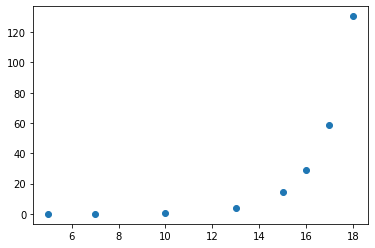

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter([5, 7, 10, 13, 15, 16, 17, 18],[0, .1, .5, 3.9, 14.5, 29.2, 58.4, 130.5])